# Generate plots from Appendix D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

import utils
import response_matrix

In [2]:
def find_first_crossing(ref, x):
    # TODO: maybe add interpolation function to hit the exact crossover point.
    out = []
    for i, (ui, xi) in enumerate(zip(ref, x)):
        if xi <= ui:
            out.append(i)
        else:
            break
    return out

array([1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05,
       1.e-04, 1.e-03, 1.e-02, 1.e-01])

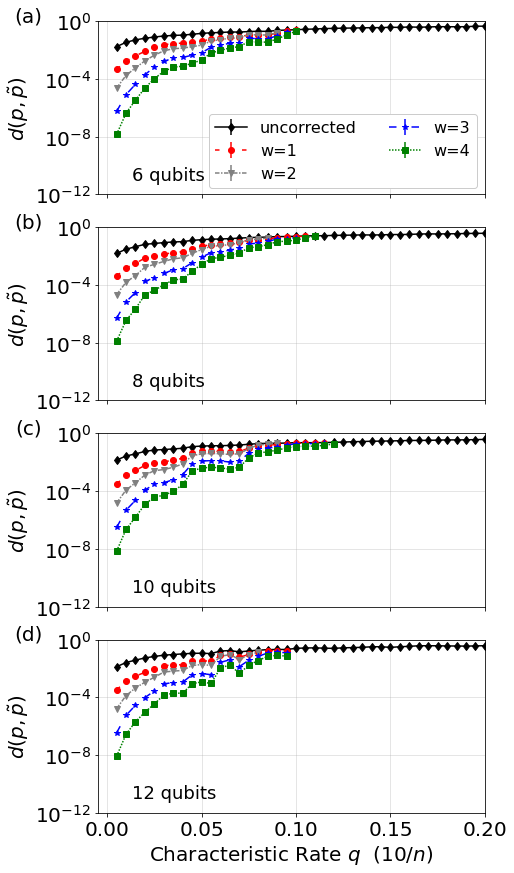

In [65]:
ntrials = 20
wvals = [1, 2, 3, 4]
nqubits_lst = [6, 8, 10, 12]
qvals = np.linspace(0.005 , 0.2, 40)[:]

plt.style.use('./style.mplstyle')
fig, axes = plt.subplots(4, 1, figsize=(7, 12), constrained_layout=True, sharey=True, sharex=True)

x = np.asarray([0] + wvals)

leglabs = [f"{x} qubits" for x in nqubits_lst]
markers = ['s', '*', 'v', 'o', 'd']
colors = ['k', 'r', 'gray', 'b', 'g']

# Second figure: plot trace distance asfu of characteristic q
leglabels = ["uncorrected"] + [f"w={w}" for w in wvals]
linestyles = ["solid", (0, (3, 7, 1, 7)), (0, (3, 1, 1, 1)), (0, (5, 10)), (0, (1, 1))]
markers_2 = list(reversed(markers)) # scramble these to avoid visual continuity

ax_list = axes.flatten()
n_qubits_list = [6, 8, 10, 12]

for n_qubits, ax in zip(n_qubits_list, ax_list):
    q_outcomes = np.load("experiments/{}qubits_scaling_results_4.npy".format(n_qubits))
    q_avg_outcomes = q_outcomes.mean(axis=2)
    q_var_outcomes = q_outcomes.std(axis=2) / np.sqrt(ntrials) # "standard error" = SD / sqrt(ntrials)
    # q_var_outcomes = q_outcomes.std(axis=2) # "standard error" = SD / sqrt(ntrials)
    for j, yt in enumerate(q_avg_outcomes):
        y = yt[:]
        mask = range(len(y))
        if j != 0:
            mask = find_first_crossing(q_avg_outcomes[0,:],y)

        confidence = q_var_outcomes[j][mask]
        ax.errorbar(
            qvals[mask], y[mask], yerr=confidence, label=leglabels[j],
            marker=markers_2[j], ls=linestyles[j], c=colors[j])
    ax.text(0.013, 10**-11, '{nq} qubits'.format(nq=n_qubits), fontsize=18)

logymin = -12
# yticks = np.logspace(logymin, -1, 12)
# yticks = [yticks[i+1] for i in range(0,11,3)]
    
# Formatting for both
for j, ax in enumerate(ax_list):
    ax.grid(True, alpha=0.4)
    ax.set_ylim(10**logymin, 10**0)
    ax.semilogy()
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel(r"$d(p, \tilde{p})$", fontsize=20)
#     ax.text(0.00, 10**(logymin + 0.5), '{nq} qubits'.format(nq=n_qubits), fontsize=18)

#     ax.set_yticks(yticks)
    ax.set_xlim(ax.get_xlim()[0], 0.2)
ax_list[-1].set_xlabel(r"Characteristic Rate $q $  ($10 / n$)", fontsize=20)
ax_list[0].legend(leglabels, fontsize=16, framealpha=1, ncol=2, loc="center right", bbox_to_anchor=(1, 0.25))

for ax, lab in zip(axes, ["(a)", "(b)", "(c)", "(d)"]):
    ax.text(-0.18, 1.03, lab, horizontalalignment='center', verticalalignment='center', size=20, transform=ax.transAxes)


fig.savefig("figures/figure_d1.pdf")

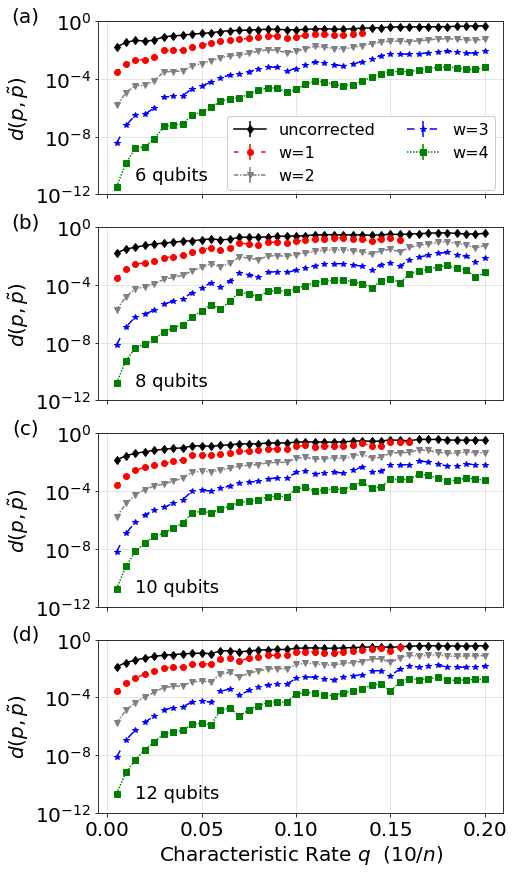

In [63]:
ntrials = 20
wvals = [1, 2, 3, 4]
nqubits_lst = [6, 8, 10, 12]
qvals = np.linspace(0.005 , 0.2, 40)[:]

plt.style.use('./style.mplstyle')
fig, axes = plt.subplots(4, 1, figsize=(7, 12), constrained_layout=True, sharey=True, sharex=True)

x = np.asarray([0] + wvals)

leglabs = [f"{x} qubits" for x in nqubits_lst]
markers = ['s', '*', 'v', 'o', 'd']
colors = ['k', 'r', 'gray', 'b', 'g']

# Second figure: plot trace distance asfu of characteristic q
leglabels = ["uncorrected"] + [f"w={w}" for w in wvals]
linestyles = ["solid", (0, (3, 7, 1, 7)), (0, (3, 1, 1, 1)), (0, (5, 10)), (0, (1, 1))]
markers_2 = list(reversed(markers)) # scramble these to avoid visual continuity

ax_list = axes.flatten()
n_qubits_list = [6, 8, 10, 12]

for n_qubits, ax in zip(n_qubits_list, ax_list):
    q_outcomes = np.load("experiments/{}qubits_scaling_results_4a.npy".format(n_qubits))
    q_avg_outcomes = q_outcomes.mean(axis=2)
    q_var_outcomes = q_outcomes.std(axis=2) / np.sqrt(ntrials) # "standard error" = SD / sqrt(ntrials)
    # q_var_outcomes = q_outcomes.std(axis=2) # "standard error" = SD / sqrt(ntrials)
    for j, yt in enumerate(q_avg_outcomes):
        y = yt[:]
        mask = range(len(y))
        if j != 0:
            mask = find_first_crossing(q_avg_outcomes[0,:],y)

        confidence = q_var_outcomes[j][mask]
        ax.errorbar(
            qvals[mask], y[mask], yerr=confidence, label=leglabels[j],
            marker=markers_2[j], ls=linestyles[j], c=colors[j])
    ax.text(0.015, 10**-11, '{nq} qubits'.format(nq=n_qubits), fontsize=18)

logymin = -12
# yticks = np.logspace(logymin, -1, 12)
# yticks = [yticks[i+1] for i in range(0,11,3)]
    
# Formatting for both
for j, ax in enumerate(ax_list):
    ax.grid(True, alpha=0.4)
    ax.set_ylim(10**logymin, 10**0)
    ax.semilogy()
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel(r"$d(p, \tilde{p})$", fontsize=20)

#     ax.set_yticks(yticks)
#     ax.set_xlim(ax.get_xlim()[0], 0.15)
ax_list[-1].set_xlabel(r"Characteristic Rate $q $  ($10 / n$)", fontsize=20)
ax_list[0].legend(leglabels, fontsize=16, framealpha=1, ncol=2, loc="center right", bbox_to_anchor=(1, 0.24))

for ax, lab in zip(axes, ["(a)", "(b)", "(c)", "(d)"]):
    ax.text(-0.18, 1.03, lab, horizontalalignment='center', verticalalignment='center', size=20, transform=ax.transAxes)



fig.savefig("figures/figure_d2.pdf")